# GA 2.8: [Ice Ice Baby](https://www.youtube.com/watch?v=rog8ou-ZepE), Part 3

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.8, January 17, 2025.*

This part considers how the probaiblity of winning may change with a different distribution of breakup day and minute.

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>This notebooks is particularly useful for Question 2 of the report.</p></div>

In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from tools import *

pickle_path = os.path.join('pickles',
                           'tickets_per_minute.pkl')
with open(pickle_path, 'rb') as f:
    loaded_radial_dist_list = pickle.load(f)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1:</b>   

Run this cell to reset the probability model with a new distribution of the breakup day. Note that the pickle file is reset and rebuilt, which takes around 20-30 seconds.

</p>
</div>

<div style="background-color:#ffa6a6; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"><p>Running this cell will delete the pickle file and change the calculations in Notebooks 1 and 2. Make sure you reset the pickle file before rerunning those notebooks, or do this on a separate computer from group members who are working on Notebooks 1 and 2. To reset the pickle file to the "original" value simply run the cell below without the keyword argument that overrides the moments.</div>

Pickle reset.


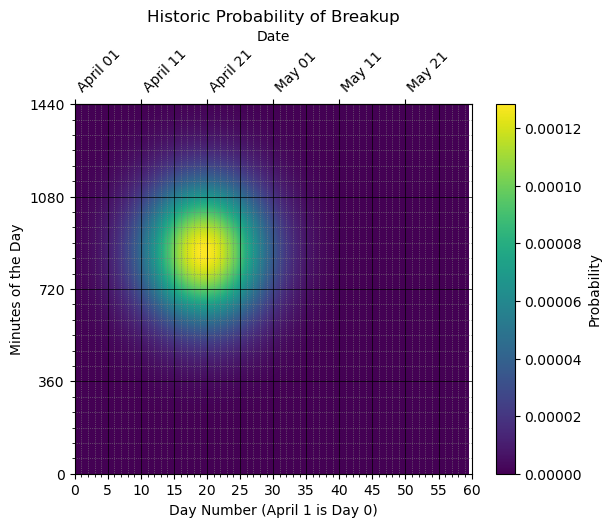

In [2]:
Models.reset_prob_pickle()
m = Models(moments_day=(20, 6.5))
m.plot(0)

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2:</b>   

Once you have a new probability model, you can do a new simulation for whatever set of tickets you like to see if you can improve your chances of winning, based on the new model.

</p>
</div>

Name: no name
Reference: April 1
Days: 60
Number of tickets: 1440
Cost for all tickets: 4320.0



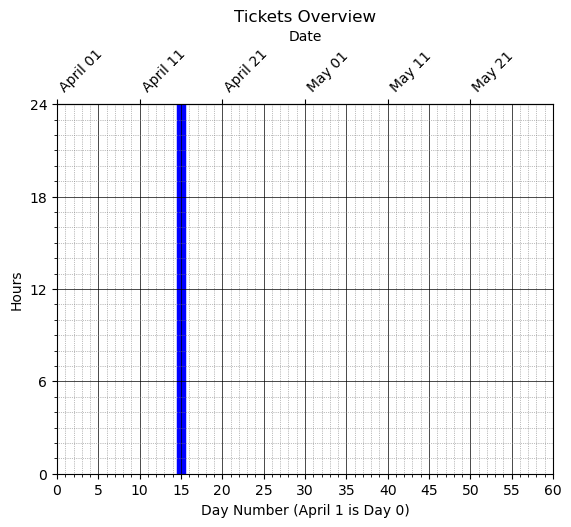

In [3]:
t = Tickets()
t.add([[15]])
# t.add([[27, 28, 29]])
# t.add([[14], [13]])
t.status()
t.show()

The probability of any ticket winning is 4.284e-02
Number of tickets: 	1440
Cost tickets: 		 4.32e+00 kUSD 	( 4320 USD)
Expected winnings: 	 1.23e+01 kUSD 	(12342 USD)
Expected profit: 	 8.02e+00 kUSD 	( 8022 USD)


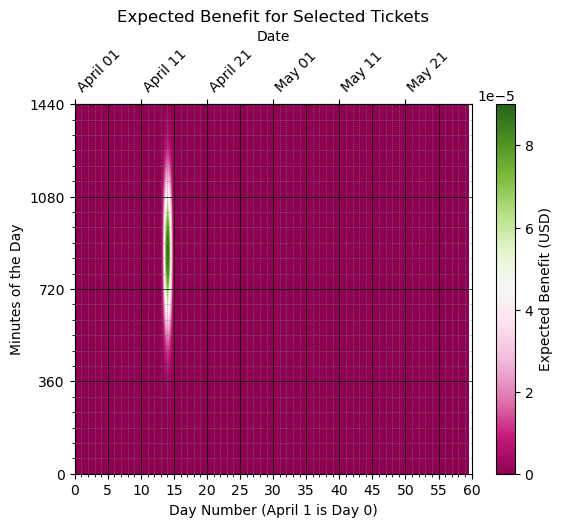

In [4]:
m = Models()

prob_T = np.zeros((len(t.tickets)))
Nw_T = np.zeros((len(t.tickets)))

for i, ti in enumerate(t.tickets):
    prob_T[i] = m.get_p([ti])
    day, min = Minutes.get_day_min(ti)
    Nw_T [i] = m.ticket_model(day, min)

prob_T_matrix = m.map_data_to_day_min(prob_T, t.tickets)
prob_all = np.sum(prob_T)

print(f"The probability of any ticket winning is {prob_all:.3e}")
cost_tickets = len(t.tickets)*3
expected_winnings = np.sum(300*prob_T/(Nw_T + 1))
expected_profit = expected_winnings - .003*len(t.tickets)
print(f"Number of tickets: \t{len(t.tickets)}")
print(f"Cost tickets: \t\t{cost_tickets/1000:9.2e} kUSD \t({len(t.tickets)*3:5.0f} USD)")
print(f"Expected winnings: \t{expected_winnings:9.2e} kUSD \t({expected_winnings*1000:5.0f} USD)")
print(f"Expected profit: \t{expected_profit:9.2e} kUSD \t({expected_profit*1000:5.0f} USD)")

m.plot(prob_T_matrix)

In [5]:
Ns = 100000
sampled_ticket = np.zeros((Ns,), dtype=int)
sampled_probability = np.zeros((Ns,))
sampled_winnings = np.zeros((Ns,))
for i in range(Ns):
    sampled_ticket[i] = random.choices(t.tickets, weights=prob_T, k=1)[0]
    sampled_probability[i] = prob_T[
        t.tickets.index(sampled_ticket[i])]
    sampled_winnings[i] = 300/(1 + sample_integer(
        loaded_radial_dist_list[sampled_ticket[i]]))

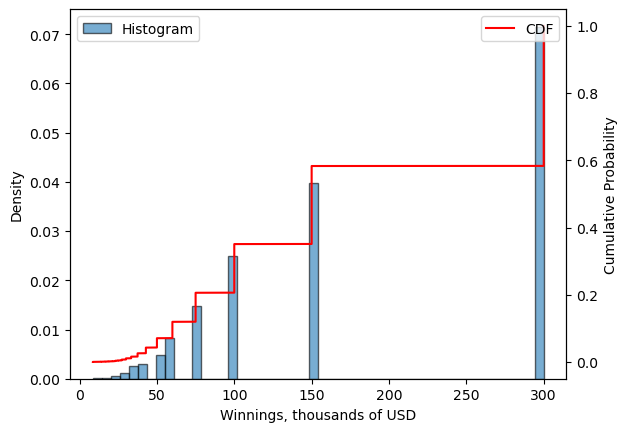

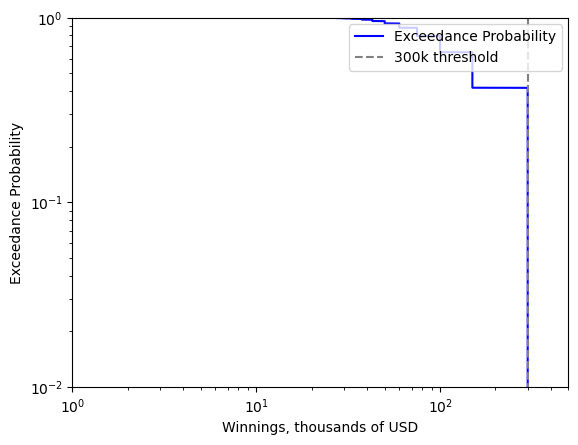

In [6]:
plot_hist_and_cdf(sampled_winnings,
                  xlim=(1,500), ylim=(1e-2, 1))

In [7]:
print("=====================================")
print("    USING EXPECTED VALUE CALC    ")
print("=====================================")
print(f"Number of tickets: \t{len(t.tickets)}")
print(f"Cost tickets: \t\t{cost_tickets/1000:9.2e} kUSD \t({len(t.tickets)*3:5.0f} USD)")
print(f"Expected winnings: \t{expected_winnings:9.2e} kUSD \t({expected_winnings*1000:5.0f} USD)")
print(f"Expected profit: \t{expected_profit:9.2e} kUSD \t({expected_profit*1000:5.0f} USD)")

    USING EXPECTED VALUE CALC    
Number of tickets: 	1440
Cost tickets: 		 4.32e+00 kUSD 	( 4320 USD)
Expected winnings: 	 1.23e+01 kUSD 	(12342 USD)
Expected profit: 	 8.02e+00 kUSD 	( 8022 USD)


**End of notebook.**

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    By <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE Team</a>
    &copy; 2024 TU Delft. 
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0</a>.
    <a rel="Zenodo DOI" href="https://doi.org/10.5281/zenodo.16782515"><img style="width:auto; height:15; vertical-align:middle" src="https://zenodo.org/badge/DOI/10.5281/zenodo.16782515.svg" alt="DOI https://doi.org/10.5281/zenodo.16782515"></a>
  </div>
</div>


<!--tested with WS_2_8_solution.ipynb-->